# Imports and Dependencies
Start your notebook by importing any necessary libraries and dependencies that you'll need throughout your code. This could include things like NumPy, Pandas, scikit-learn, or TensorFlow.

In [1]:
import torch
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device      
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

PyTorch version: 2.0.1
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


In [2]:
# code from https://github.com/jeffheaton/t81_558_deep_learning/blob/pytorch/install/pytorch-install-aug-2022.ipynb
# What version of Python do you have?
import sys
import platform
import torch
import pandas as pd
import sklearn as sk

has_gpu = torch.cuda.is_available()
has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "gpu" if torch.cuda.is_available() else "cpu"

print(f"Python Platform: {platform.platform()}")
print(f"PyTorch Version: {torch.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

Python Platform: macOS-13.4.1-arm64-i386-64bit
PyTorch Version: 2.0.1

Python 3.9.17 (main, Jul  5 2023, 15:44:56) 
[Clang 14.0.6 ]
Pandas 2.0.3
Scikit-Learn 1.3.0
GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


In [3]:
! pip list

Package             Version
------------------- -----------------
aiohttp             3.8.4
aiosignal           1.3.1
appdirs             1.4.4
appnope             0.1.3
asttokens           2.2.1
async-timeout       4.0.2
attrs               23.1.0
backcall            0.2.0
brotlipy            0.7.0
certifi             2023.5.7
cffi                1.15.1
charset-normalizer  2.0.4
comm                0.1.3
contourpy           1.1.0
cryptography        39.0.1
cycler              0.11.0
datasets            2.13.1
debugpy             1.6.7
decorator           5.1.1
dill                0.3.6
executing           1.2.0
filelock            3.12.2
fonttools           4.40.0
frozenlist          1.3.3
fsspec              2023.6.0
gmpy2               2.1.2
huggingface-hub     0.16.4
idna                3.4
importlib-metadata  6.8.0
importlib-resources 6.0.0
ipykernel           6.24.0
ipython             8.14.0
jedi                0.18.2
Jinja2              3.1.2
joblib              1.2.0
jupyter_c

In [4]:
# To verify that Jupyter Notebook is configured properly
# This code will display the path to the Python executable that Jupyter Notebook is using. Make sure it corresponds to the same Python environment where you installed scikit-learn.

import sys
sys.executable

'/opt/anaconda3/envs/ml/bin/python'

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn import metrics, model_selection, tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import random
import torch
from torch import nn, optim
import math
from IPython import display
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
import sklearn
print(sklearn.__version__)

1.3.0


# Data Preparation
Load your dataset into memory, and perform any necessary preprocessing steps. This might include tasks like cleaning the data, handling missing values, feature scaling, encoding categorical variables, and so on.

In [8]:
! pwd

/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge


In [9]:
# checking the envinment directory 
! type pip

pip is /opt/anaconda3/envs/ml/bin/pip


In [10]:
! cd /Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge

In [11]:
# Loading the data
# Loading the dataset into a Pandas Dataframe - train, test and validate 
    # the data is already divided into train test and validate    
from PIL import Image
import os

# Specify the directory where your images are located
data_dir = '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle'

In [12]:
from PIL import Image
import os

# Get the list of subdirectories (train, test, validate)
subdirectories = ['train', 'test']

# Create an empty dictionary to store the loaded images
loaded_images = {}

# Iterate over the subdirectories
for subdirectory in subdirectories:
    # Create an empty dictionary for the current subdirectory
    subdirectory_images = {}

    # Get the path to the current subdirectory
    subdirectory_path = os.path.join(data_dir, subdirectory)

    # Create a list to store images from the current subdirectory
    image_list = []

    # Iterate over the files in the subdirectory subfolder
    for filename in os.listdir(subdirectory_path):
        # Get the path to the current image file
        image_path = os.path.join(subdirectory_path, filename)

        # Append the loaded image to the image_list
        image_list.append(image_path)

    # Add the subdirectory_images dictionary to the loaded_images dictionary with the subdirectory name as the key
    loaded_images[subdirectory] = image_list


In [13]:
loaded_images['train'][0]

'/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/008081.png'

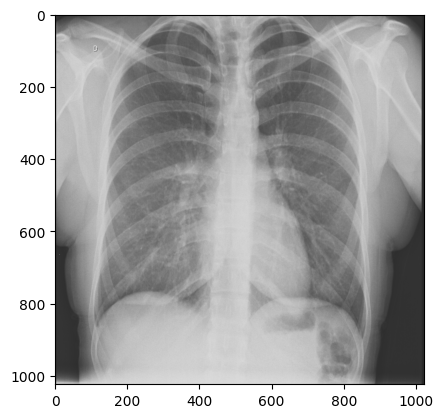

In [14]:
image = Image.open(loaded_images['train'][0])
plt.imshow(image)

## Getting the training labels

The file train_gender.csv contains the labels (gender column) for the training set and the corresponding ImageId (imageId column), so we will extract the labels and store them in a variable "train_labels". 

In [15]:
train_gender_data = pd.read_csv("train_gender.csv") 

In [16]:
train_gender_data

,imageId,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0
...,...,...
10697,10697,0
10698,10698,0
10699,10699,1
10700,10700,0


In [17]:
# let's get the gender column from the train_gender_data corresponding to our train labels
train_labels = train_gender_data['gender']

In [18]:
y_train = train_labels

In [19]:
y_train

0        0
1        0
2        1
3        1
4        0
        ..
10697    0
10698    0
10699    1
10700    0
10701    1
Name: gender, Length: 10702, dtype: int64

In order to have the labels corresponding to their respective images, we sort loaded_images['train'] so they correspond to the ordering of the labels in train_labels. 

In [20]:
loaded_images['train']

['/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/008081.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/004863.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/006912.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/006906.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/004877.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/008095.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/005599.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/004687.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/001927.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/006090.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/008903.png',
 '/Users/m

In [21]:
# sorting the training and testing images to correspond to the order of the labels 
loaded_images['train'] = sorted(loaded_images['train'])
loaded_images['test'] = sorted(loaded_images['test'])

In [22]:
loaded_images['train']

['/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/000000.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/000001.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/000002.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/000003.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/000004.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/000005.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/000006.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/000007.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/000008.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/000009.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/train/000010.png',
 '/Users/m

In [23]:
loaded_images['test']

['/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/test/000000.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/test/000001.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/test/000002.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/test/000003.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/test/000004.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/test/000005.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/test/000006.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/test/000007.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/test/000008.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/test/000009.png',
 '/Users/mac/Desktop/Jupyter/BumbleKite/Day3_Tuto/adv_Challenge/kaggle/test/000010.png',
 '/Users/mac/Desktop/

Note the challenge only provided the labels for the training set (y_train), there is no y_test. 
* X_train = loaded_images['train']
* y_train = train_labels

#### Getting the testing labels 
As it is a still active challenge they did not share the testing labels.

# Exploratory Data Analysis
In this section, you can explore the data to gain insights about the distribution of features, correlation between features, and identify any patterns or trends in the data.

## Data distribution 

In [24]:
len(loaded_images['test'])

11747

In [25]:
len(loaded_images['train'])

10702

In [26]:
class_name = ['train', 'test']
total_images = len(loaded_images['test']) + len(loaded_images['train'])
train_percentage = len(loaded_images['train']) / total_images
test_percentage = len(loaded_images['test']) / total_images

print(f"Train percentage: {train_percentage}")
print(f"Test percentage: {test_percentage}")

Train percentage: 0.47672502115907167
Test percentage: 0.5232749788409283


### Distribution of gender accross the training set

In [27]:
import pandas as pd

# Convert y_train to a pandas Series
y_train_series = pd.Series(y_train)

# Count the number of occurrences of each gender
gender_counts = y_train_series.value_counts()

# Create a dataframe with gender and count columns
gender_distribution = pd.DataFrame({'Gender': ['Female', 'Male'], 'Count': gender_counts})

# Set the Gender column as the index
gender_distribution.set_index('Gender', inplace=True)

# Print the gender distribution table
print("Gender Distribution for Training Set:")
print(gender_distribution)

Gender Distribution for Training Set:
        Count
Gender       
Female   6209
Male     4493


Based on the gender distribution, it appears that the training data is a bit biased towards the "Female" gender, as there are 6,209 samples labeled as "Female" and 4,493 samples labeled as "Male". This suggests that there are more examples of the "Female" gender compared to the "Male" gender in the training data. 

# Preprocess the data

* Normalize pixel values: Convert the pixel values of the images to a common scale, typically between 0 and 1.
You can achieve this by dividing the pixel values by the maximum pixel value, such as 255, assuming the images are in the 8-bit range.
Resize the images:

* Resize the images to a consistent size that is suitable for your CNN architecture.
Consider the computational resources available and strike a balance between image resolution and memory requirements.
Resizing can be done using libraries like OpenCV or the resize() function in Python's PIL (Python Imaging Library).

* Convert the images to NumPy arrays: 
CNNs typically expect input data in the form of NumPy arrays.
Convert the preprocessed images to NumPy arrays using libraries like NumPy or OpenCV.

In [28]:
%%time 
# CPU times: user 5min 49s, sys: 17.1 s, total: 6min 6s
# Wall time: 7min 3s

# ok so sometimes the kernel dies sometimes not :)) 

import numpy as np
import cv2

# Preprocessing steps
def preprocess_images(image_paths):
    images = [] # initialising an empty list 
    for path in image_paths:
        img = cv2.imread(path, 0)  # Load image in grayscale
        img = img / 255.0  # Normalize pixel values between 0 and 1
        img = cv2.resize(img, (224, 224))  # Resize image to (224, 224)
        images.append(img)
    preprocessed_images = np.array(images)  # Convert images to NumPy array
    return preprocessed_images

# Preprocess training images
train_image_paths = loaded_images['train']  # Assuming loaded_images['train'] contains image paths
train_images = preprocess_images(train_image_paths)

# Preprocess test images
test_image_paths = loaded_images['test']  # Assuming loaded_images['test'] contains image paths
test_images = preprocess_images(test_image_paths)

CPU times: user 5min 48s, sys: 16.7 s, total: 6min 4s
Wall time: 7min 1s


Now we have the images as NumPy arrays and the shape of the preprocessed images will be (num_images, 224, 224). 

In [29]:
test_images[0]

array([[0.        , 0.        , 0.54885955, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.49553822, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.50336134, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
print(len(test_images))
print(len(train_images))

11747
10702


# Model Deveploment 
Task : Predicting gender from Chest X rays. 

1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Constructing a model. 
3. Defining a loss function and optimizer.
4. Creating a training loop 

### Setting up device agnostic code
We want to make sure we work with Metal acceleration of the M1 Chip. 

In [31]:
# Double checking if i m using M1 GPU

import torch

# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")
    # Set the current device to the first GPU
    device = torch.device("cuda:0")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. Using CPU.")
    # Set the device to CPU
    device = torch.device("cpu")

CUDA is not available. Using CPU.


In [32]:
# We can switch the model to the MPS device. https://towardsdatascience.com/gpu-acceleration-comes-to-pytorch-on-m1-macs-195c399efcc1
device = torch.device('mps')

### Design your CNN architecture:
Define a Convolutional Neural Network. 
* Select an appropriate CNN architecture for your task. This can include stacking convolutional layers, pooling layers, and optionally adding dropout layers for regularization.
* Experiment with different network depths, filter sizes, and activation functions to find the best configuration for your dataset.

In [33]:
# import torch
# import torch.nn as nn

# class GenderDetectionCNN(nn.Module):
#     def __init__(self):
#         super(GenderDetectionCNN, self).__init__()

#         self.conv_layers = nn.Sequential(
#             nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),  # Updated input channels to 32
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2)
#         )

#         self.fc_layers = nn.Sequential(
#             nn.Linear(128 * 14 * 14, 512),
#             nn.ReLU(),
#             nn.Dropout(0.5),

#             nn.Linear(512, 256),
#             nn.ReLU(),
#             nn.Dropout(0.5),

#             nn.Linear(256, 2)
#         )

#     def forward(self, x):
#         x = self.conv_layers(x)
#         x = x.view(x.size(0), -1)
#         x = self.fc_layers(x)
#         return x


In [34]:
# import torch
# import torch.nn as nn

# class GenderDetectionCNN(nn.Module):
#     def __init__(self):
#         super(GenderDetectionCNN, self).__init__()
        
#         # responsible for the initial feature extraction and downscaling
#         self.conv_layers = nn.Sequential(
#             nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),  # Updated input channels to 32
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2)
#         )

#         # responsible for the final transformation and classification.
#         self.fc_layers = nn.Sequential(
#             nn.Linear(128 * 14 * 14, 512),
#             nn.ReLU(),
#             nn.Dropout(0.5),

#             nn.Linear(512, 256),
#             nn.ReLU(),
#             nn.Dropout(0.5),

#             nn.Linear(256, 2)
#         )

#     def forward(self, x):
#         x = self.conv_layers(x)
#         x = x.view(x.size(0), -1)
#         x = self.fc_layers(x)
#         return x

In [35]:
# import torch
# import torch.nn as nn

# class GenderDetectionCNN(nn.Module):
#     def __init__(self):
#         super(GenderDetectionCNN, self).__init__()

#         self.features = nn.Sequential(
#             nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#         )

#         self.classifier = nn.Sequential(
#             nn.Linear(32 * 56 * 56, 256),
#             nn.ReLU(),
#             nn.Dropout(0.5),

#             nn.Linear(256, 2)
#         )

#     def forward(self, x):
#         x = self.features(x)
#         x = x.view(x.size(0), -1)
#         x = self.classifier(x)
#         return x


In [36]:
# # expected input [1, 16, 224, 224]  
#  # [ numb of input channels, num of output channels, dimentions , dimentions]
    
    
# import torch
# import torch.nn as nn

# class GenderDetectionCNN(nn.Module):
#     def __init__(self):
#         super(GenderDetectionCNN, self).__init__()

#         self.features = nn.Sequential(
#             nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#         )

#         self.classifier = nn.Sequential(
#             nn.Linear(32 * 56 * 56, 256),
#             nn.ReLU(),
#             nn.Dropout(0.5),

#             nn.Linear(256, 2)
#         )

#     def forward(self, x):
#         x = self.features(x)
#         x = x.view(x.size(0), -1)
#         x = self.classifier(x)
#         return x


In [37]:
# import torch
# import torch.nn as nn

# class GenderDetectionCNN(nn.Module):
#     def __init__(self):
#         super(GenderDetectionCNN, self).__init__()

#         self.features = nn.Sequential(
#             nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#         )

#         self.classifier = nn.Sequential(
#             nn.Linear(32 * 56 * 56, 256),
#             nn.ReLU(),
#             nn.Dropout(0.5),

#             nn.Linear(256, 2)
#         )

#     def forward(self, x):
#         x = self.features(x)
#         x = x.view(x.size(0), -1)
#         x = self.classifier(x)
#         return x


In [38]:
# makes kernel crash 
# import torch
# import torch.nn as nn

# class GenderDetectionCNN(nn.Module):
#     def __init__(self):
#         super(GenderDetectionCNN, self).__init__()

#         self.features = nn.Sequential(
#             nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#         )

#         self.classifier = nn.Sequential(
#             nn.Linear(256 * 28 * 28, 512),
#             nn.ReLU(),
#             nn.Dropout(0.5),

#             nn.Linear(512, 2)
#         )

#     def forward(self, x):
#         x = self.features(x)
#         x = x.view(x.size(0), -1)
#         x = self.classifier(x)
#         return x

In [39]:
# this one works 

import torch
import torch.nn as nn

class GenderDetectionCNN(nn.Module):
    def __init__(self):
        super(GenderDetectionCNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(32 * 56 * 56, 256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 2)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

The `self.features` sequence contains two convolutional layers with ReLU activation and max pooling operations. These layers are responsible for extracting features from the input images.

The `self.classifier` sequence consists of fully connected layers. The first linear layer takes the flattened output of the last convolutional layer as input and applies ReLU activation. Dropout regularization is applied after the first linear layer to prevent overfitting. The final linear layer produces the output logits for the two gender classes (female and male).

The `forward` method defines the forward pass of the model. It passes the input `x` through the feature extraction layers (`self.features`), reshapes the output, and then passes it through the classification layers (`self.classifier`) to produce the predicted logits.

Overall, the model architecture looks suitable for the gender detection task with 2 classes. However, it's important to note that the effectiveness of the model depends on factors such as the quality and size of the dataset, the training procedure, and the specific requirements of the task.

The expected shape of the input tensor for this code is [batch_size, 1, 224, 224]
* batch_size refers to the number of samples in a batch.
* 1 represents the number of input channels (grayscale images have 1 channel).
* 224 is the height and width of the input images.

The input tensor should have the same shape as the input images provided to the model during training or inference. Each image should be a grayscale image with a height and width of 224 pixels. The 1 channel indicates that the images are grayscale.

In [40]:
device = torch.device('mps')

In [41]:
# Create an instance of the GenderDetectionCNN model and send it to target device
model = GenderDetectionCNN().to(device)
model

GenderDetectionCNN(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=100352, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=256, out_features=2, bias=True)
  )
)

### Setup loss function and optimizer

Note: Recall a loss function is what measures how wrong your model predictions are, the higher the loss, the worse your model.

Also, PyTorch documentation often refers to loss functions as "loss criterion" or "criterion", these are all different ways of describing the same thing.

In [42]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
    # lr - learning rate 
# optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1) # 0.58 
# optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01) # 0.9 BUT OFF learning curve - trying a new learning rate hoping for a better performance 
# optimizer = torch.optim.SGD(params=model.parameters(), lr=0.000001) # trying a new learning rate hoping for a better performance 
# optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001) # trying a new learning rate hoping for a better performance 

# optimizer = torch.optim.SGD(params=model.parameters(), lr=0.00001) # trying a new learning rate hoping for a better performance 
# gives the same validation accuracy again and again stuck on 0.58 -> basically no learning

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001) # learning rate with best performance so far

In [43]:
# evaluation metric

# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

### Train Validate Split
There is an issue here as we are only given train_gender.csv (the training set containing two columns: imageId (same and gender), sample_submission_gender.csv (a sample submission file containing two columns: imageId and predicted gender). Indeed, we don't have the test labels.  

Solution: To build your training and testing loop without test labels, you can split your provided training data (X_train and y_train) into training and validation sets (80% and 20%). This will allow you to evaluate the performance of your model during training and make predictions on the test data for the challenge.

N.B: Even if the size of the test set is 11747 and the training 10702,it is best to split your training set into training and validation sets, keeping the test set completely separate until you have completed the model training and tuning process.

In [44]:
%%time 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, y_train, test_size=0.2, random_state=42)

CPU times: user 208 ms, sys: 3.08 s, total: 3.28 s
Wall time: 27.2 s


In [45]:
# Get the shape of the training and validation data
train_shape = X_train.shape
val_shape = X_val.shape

# Print the shapes
print("Training data shape:", train_shape)
print("Validation data shape:", val_shape)

Training data shape: (8561, 224, 224)
Validation data shape: (2141, 224, 224)


In [46]:
# Print the lengths of X_train, y_train, X_val, and y_val to ensure they have the same number of samples
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))
print("Length of X_val:", len(X_val))
print("Length of y_val:", len(y_val))

Length of X_train: 8561
Length of y_train: 8561
Length of X_val: 2141
Length of y_val: 2141


In [47]:
# Double-check that the indices of X_train and y_train are aligned correctly.
print("X_train indices:", range(5))
print("y_train indices:", range(5))

X_train indices: range(0, 5)
y_train indices: range(0, 5)


In [48]:
# X_train

In [49]:
print(X_train.shape)

(8561, 224, 224)


### Create data loaders for training and validation data. 
Data loaders are useful for loading data in batches during training. You can use PyTorch's DataLoader class for this purpose. 

In [50]:
batch_size = 16  # Define the desired batch size

In [51]:
# Checking for missing values in X_train and y_train:
import numpy as np

print(np.isnan(X_train).sum())
print(np.isnan(y_train).sum())

0
0


No missing values 

In [52]:
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))

Length of X_train: 8561
Length of y_train: 8561


In [53]:
X_train.shape

(8561, 224, 224)

In [54]:
y_train.shape
#  1-dimensional array with 8561 elements

(8561,)

In [55]:
%%time
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# Convert the numpy arrays to torch tensors
x_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.tensor(y_train.values)  # Convert Pandas Series to NumPy array
x_val_tensor = torch.from_numpy(X_val) 
y_val_tensor = torch.tensor(y_val.values)  # Convert Pandas Series to NumPy array

CPU times: user 906 µs, sys: 2.97 ms, total: 3.88 ms
Wall time: 13.8 ms


In [56]:
# Reshape the tensors to match the expected input shape of the CNN model
x_train_tensor = x_train_tensor.unsqueeze(1)  # Add a channel dimension
x_val_tensor = x_val_tensor.unsqueeze(1)  # Add a channel dimension

In [57]:
x_train_tensor.shape

torch.Size([8561, 1, 224, 224])

Now the shaoe of the tensors matches the shape expected by the model
x_train_tensor (torch.Size([8561, 1, 224, 224])) matches the expected shape for our model([batch_size, 1, 224, 224]).



In [58]:
# Create a TensorDataset for train data 
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)

# Create a TensorDataset for validation data
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

In [59]:
# Create a DataLoader
batch_size = 16  # Adjust the batch size as per your requirement
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

### Training and validation loops
During each training iteration, you will forward pass the data through your model, compute the loss, perform backpropagation, and update the model's weights. 

This code can be useful for debugging and verifying the dimensions of the input data during training. It allows you to check if the data is being loaded correctly and has the expected shapes before passing it to the model for training or inference.






In [60]:
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx}:")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    # Additional print statements or checks if needed

Batch 0:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.Size([16])
Batch 1:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.Size([16])
Batch 2:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.Size([16])
Batch 3:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.Size([16])
Batch 4:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.Size([16])
Batch 5:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.Size([16])
Batch 6:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.Size([16])
Batch 7:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.Size([16])
Batch 8:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.Size([16])
Batch 9:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.Size([16])
Batch 10:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.Size([16])
Batch 11:
Images shape: torch.Size([16, 1, 224, 224])
Labels shape: torch.S

In your specific output, it shows the information for 5 batches (Batch 0 to Batch 4), where each batch has 32 images with a shape of (224, 224) and 32 corresponding labels.

In [61]:
# Setting the number of epochs 
num_epochs = 50

In [62]:
device = torch.device('mps')

Even if we don't have testing labels, it is still valuable to evaluate the performance of the model using the validation set. The validation set serves as a proxy for the unseen data and allows you to assess how well your model generalizes to new examples.


In [63]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Create empty lists to store train and validation loss
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [65]:
# training and validation loop 
for epoch in range(num_epochs):
    # Training
    model.train()
    epoch_train_loss = 0.0  # Variable to store the cumulative training loss for the epoch
    correct_train = 0
    total_train = 0
 
    for batch_idx, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        # Convert the input data to float32
        images = images.float()
        labels = labels.long()  # Convert labels to long data type

        # Move the input and model to the same device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = F.cross_entropy(outputs, labels)  # Use cross-entropy loss for multi-class classification

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate the average training loss and accuracy for the epoch
    epoch_train_loss /= len(train_loader)
    epoch_train_accuracy = correct_train / total_train

    # Validation
    model.eval()

    with torch.no_grad():
        # 
        predicted_labels = []
        true_labels = []

        correct_val = 0
        total_val = 0
        epoch_val_loss = 0.0  # Variable to store the cumulative validation loss for the epoch
        for batch_idx, (images, labels) in enumerate(val_loader):
            # Convert the input data to float32
            images = images.float()
            labels = labels.long()  # Convert labels to long data type

            # Move the input and model to the same device
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)

            # Compute loss
            val_loss = F.cross_entropy(outputs, labels)
            epoch_val_loss += val_loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
            
#             # Store predicted labels and true labels for confusion matrix
            predicted_labels.extend(predicted.tolist())
            true_labels.extend(labels.tolist())


            # Delete unnecessary variables or tensors
            del images
            del labels
            del outputs
            torch.cuda.empty_cache()

        epoch_val_loss /= len(val_loader)
        epoch_val_accuracy = correct_val / total_val

    # Print the validation accuracy and loss for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {epoch_val_accuracy:.4f}, Validation Loss: {epoch_val_loss:.4f}")

    # Store the average training loss, validation loss, training accuracy, and validation accuracy for the epoch
    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    train_accuracies.append(epoch_train_accuracy)
    val_accuracies.append(epoch_val_accuracy)

Epoch 1/50, Validation Accuracy: 0.7422, Validation Loss: 0.5404
Epoch 2/50, Validation Accuracy: 0.7319, Validation Loss: 0.5501
Epoch 3/50, Validation Accuracy: 0.7487, Validation Loss: 0.5110
Epoch 4/50, Validation Accuracy: 0.7758, Validation Loss: 0.4823
Epoch 5/50, Validation Accuracy: 0.7669, Validation Loss: 0.4967
Epoch 6/50, Validation Accuracy: 0.8066, Validation Loss: 0.4464
Epoch 7/50, Validation Accuracy: 0.7244, Validation Loss: 0.5433
Epoch 8/50, Validation Accuracy: 0.6590, Validation Loss: 0.6315
Epoch 9/50, Validation Accuracy: 0.6511, Validation Loss: 0.6374
Epoch 10/50, Validation Accuracy: 0.8029, Validation Loss: 0.4397
Epoch 11/50, Validation Accuracy: 0.8043, Validation Loss: 0.4258
Epoch 12/50, Validation Accuracy: 0.8048, Validation Loss: 0.4266
Epoch 13/50, Validation Accuracy: 0.7800, Validation Loss: 0.4708
Epoch 14/50, Validation Accuracy: 0.6114, Validation Loss: 0.6829
Epoch 15/50, Validation Accuracy: 0.8529, Validation Loss: 0.3588
Epoch 16/50, Valida

In [ ]:
# performed super bad 
# import numpy as np
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Create empty lists to store train and validation loss
# train_losses = []
# val_losses = []
# train_accuracies = []
# val_accuracies = []

# for epoch in range(num_epochs):
#     # Training
#     model.train()
#     epoch_train_loss = 0.0  # Variable to store the cumulative training loss for the epoch
#     correct_train = 0
#     total_train = 0

#     for batch_idx, (images, labels) in enumerate(train_loader):
#         optimizer.zero_grad()

#         # Convert the input data to float32
#         images = images.float()
#         labels = labels.long()  # Convert labels to long data type

#         # Move the input and model to the same device
#         images = images.to(device)
#         labels = labels.to(device)

#         # Forward pass
#         outputs = model(images)

#         # Compute loss
#         loss = F.cross_entropy(outputs, labels)  # Use cross-entropy loss for multi-class classification

#         # Backpropagation and optimization
#         loss.backward()
#         optimizer.step()

#         epoch_train_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         total_train += labels.size(0)
#         correct_train += (predicted == labels).sum().item()

#     # Calculate the average training loss and accuracy for the epoch
#     epoch_train_loss /= len(train_loader)
#     epoch_train_accuracy = correct_train / total_train

#     # Validation
#     model.eval()
#     correct_val = 0
#     total_val = 0
#     epoch_val_loss = 0.0  # Variable to store the cumulative validation loss for the epoch
#     predicted_labels = []
#     true_labels = []

#     for batch_idx, (images, labels) in enumerate(val_loader):
#         # Convert the input data to float32
#         images = images.float()
#         labels = labels.long()  # Convert labels to long data type

#         # Move the input and model to the same device
#         images = images.to(device)
#         labels = labels.to(device)

#         # Forward pass
#         outputs = model(images)

#         # Compute loss
#         val_loss = F.cross_entropy(outputs, labels)
#         epoch_val_loss += val_loss.item()

#         # Calculate accuracy
#         _, predicted = torch.max(outputs.data, 1)
#         total_val += labels.size(0)
#         correct_val += (predicted == labels).sum().item()

#         # Store predicted labels and true labels for confusion matrix
#         predicted_labels.extend(predicted.tolist())
#         true_labels.extend(labels.tolist())

#         # Delete unnecessary variables or tensors
#         del images
#         del labels
#         del outputs
#         torch.cuda.empty_cache()

#     epoch_val_loss /= len(val_loader)
#     epoch_val_accuracy = correct_val / total_val

#     # Print the validation accuracy and loss for the epoch
#     print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {epoch_val_accuracy:.4f}, Validation Loss: {epoch_val_loss:.4f}")

#     # Store the average training loss, validation loss, training accuracy, and validation accuracy for the epoch
#     train_losses.append(epoch_train_loss)
#     val_losses.append(epoch_val_loss)
#     train_accuracies.append(epoch_train_accuracy)
#     val_accuracies.append(epoch_val_accuracy)

In [66]:
!pip install seaborn

The confusion matrix is a useful tool to visually summarize the model's performance. It provides a detailed breakdown of the predictions made by the model, showing how many examples were classified correctly and incorrectly for each gender category. This allows you to identify any patterns or biases in the model's predictions.

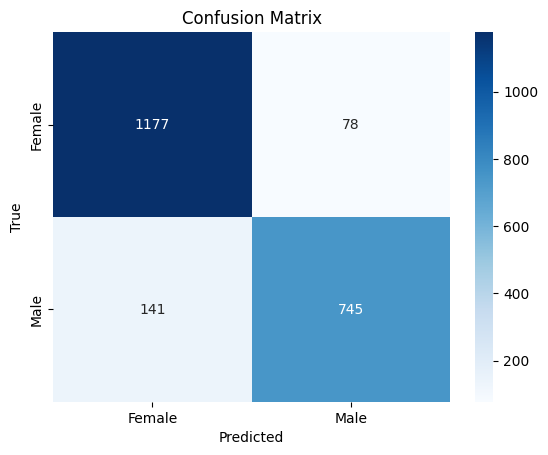

In [69]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the final confusion matrix
labels = ['Female', 'Male']
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

By calculating metrics such as precision, recall, and F1-score on the validation set, you can gain insights into the performance of your model in terms of its ability to correctly classify gender. These metrics provide measures of the model's accuracy, completeness, and overall performance.
By analyzing these metrics and the confusion matrix, you can gain a better understanding of your model's strengths and weaknesses. This information can guide further improvements in your model and help you make informed decisions about its performance and potential deployment.


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.897711349836525
Precision: 0.905224787363305
Recall: 0.8408577878103838
F1-Score: 0.8718548858981862


In sum, even without testing labels, leveraging the validation set for evaluating metrics and generating the confusion matrix can still provide valuable insights into your model's performance.

### Learning curve
Monitor the training process by observing the loss and accuracy metrics on both the training and validation sets.
Adjust hyperparameters and network architecture as needed to improve performance.

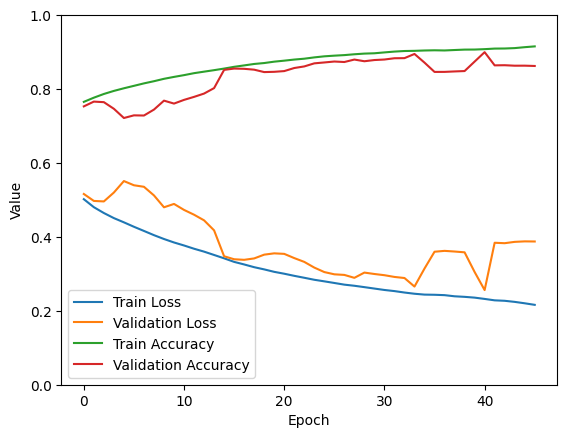

In [72]:
# Smooth the curves using moving averages
smooth_train_losses = []
smooth_val_losses = []
smooth_train_accuracies = []
smooth_val_accuracies = []

window_size = 5

for i in range(len(train_losses) - window_size + 1):
    smooth_train_losses.append(sum(train_losses[i:i+window_size]) / window_size)
    smooth_val_losses.append(sum(val_losses[i:i+window_size]) / window_size)
    smooth_train_accuracies.append(sum(train_accuracies[i:i+window_size]) / window_size)
    smooth_val_accuracies.append(sum(val_accuracies[i:i+window_size]) / window_size)

# Plotting the loss and accuracy curves
plt.plot(smooth_train_losses, label='Train Loss')
plt.plot(smooth_val_losses, label='Validation Loss')
plt.plot(smooth_train_accuracies, label='Train Accuracy')
plt.plot(smooth_val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend()
plt.show()

### Inference on the test set 

Usually, once we have trained our model and obtained satisfactory results, we can use it to make predictions on the test set provided for the challenge. Indeed, the challenge does not provide any test labels making the performance on the validation our only evaluation metric. 

The predictions list will contain the predicted gender labels for the test data.

In [73]:
test_images.shape

(11747, 224, 224)

In [75]:
# Convert the numpy arrays to torch tensors
x_test_tensor = torch.from_numpy(test_images)

# Reshape the tensors to match the expected input shape of the CNN model 
x_test_tensor = x_test_tensor.unsqueeze(1)  # Add a channel dimension

In [76]:
x_test_tensor.shape

torch.Size([11747, 1, 224, 224])

In [77]:
import torch
from torch.utils.data import Dataset, DataLoader

# Define your custom dataset class for the test set
class TestDataset(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        # You can apply any additional transformations to the image if needed
        return image

# Create an instance of the TestDataset
test_dataset = TestDataset(x_test_tensor)

# Create the test data loader
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [78]:
import torch
import csv

# Create a list to store the predictions
predictions = []

# Iterate over the test dataset
for batch_idx, images in enumerate(test_loader):
    # Move the input data to the device
    images = images.float().to(device)

    # Perform inference by passing the images through the model
    outputs = model(images)

    # Apply softmax to convert the outputs to probabilities
    probabilities = torch.softmax(outputs, dim=1)

    # Get the predicted gender (0 for female, 1 for male) by selecting the class with the highest probability
    _, predicted = torch.max(probabilities, dim=1)

    # Convert the predicted gender tensor to a list
    predicted = predicted.tolist()

    # Add the predictions to the list
    predictions.extend(predicted)

# Generate the output file with image IDs and predicted genders
with open('predictions.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_id', 'gender'])
    for image_id, prediction in enumerate(predictions):
        writer.writerow([image_id, prediction])


The file "predictions.csv" will be created in the same directory where the Jupyter Notebook is located. 

In [79]:
# Delete unnecessary variables or tensors
del x_test_tensor
torch.cuda.empty_cache()

End of the challenge. 